In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab , deltaE_cie76 
import os
import cv2
%matplotlib inline

shape:(147, 220, 3)


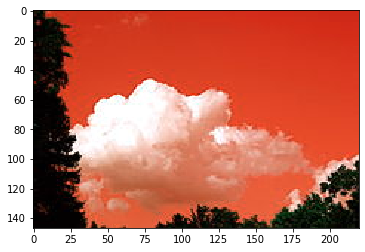

In [3]:
image = cv2.imread(r"C:\Users\Umesh\Documents\JupyterNotebook\Images\sample3.jpg")
print("shape:{}".format(image.shape))
plt.imshow(image);

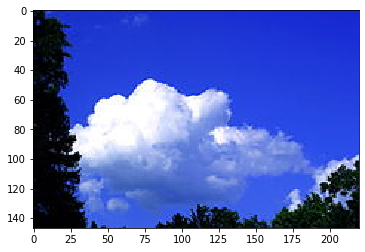

In [4]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image);

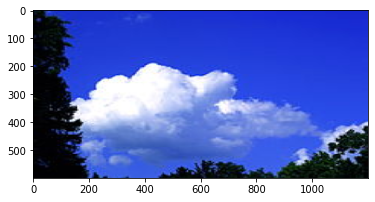

In [5]:
resized_image = cv2.resize(image, (1200,600))
plt.imshow(resized_image);

In [6]:
def HEX2RGB(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [HEX2RGB(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([231.47937684, 235.62903844, 251.01787767]),
 array([ 32.94724756,  59.93056324, 216.62891449]),
 array([ 4.55107263,  9.71273004, 11.83924099]),
 array([130.6497232 , 153.67124773, 227.71185785]),
 array([ 72.18887884, 104.01407246, 213.95296963]),
 array([33.7894404 , 50.23063547, 87.72352197])]

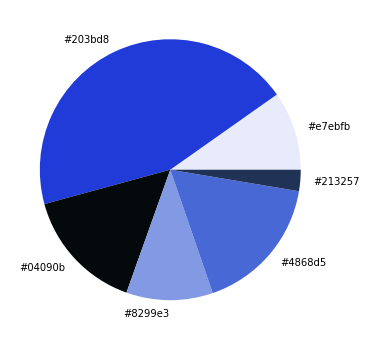

In [9]:
get_colors(get_image(r"C:\Users\Umesh\Documents\JupyterNotebook\Images\sample3.jpg"),6,True)

In [10]:
Image_Dir = 'images'
COLORS = {'RED' :[128,0,0],
          'GREEN': [0,128,0],
          'BLUE': [0,0,128]}

images = []
for file in os.listdir(Image_Dir):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(Image_Dir,file)))

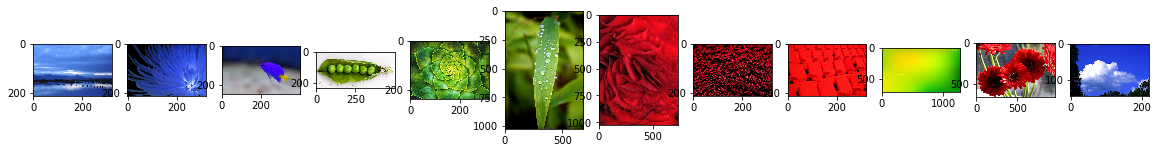

In [11]:
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i])

In [12]:
def match_image_by_color(image,color,threshold = 60, number_of_colors = 3):
    image_colors = get_colors(image,number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    return select_image

In [13]:
def show_selected_images(images,color,threshold,colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                       color,
                                       threshold,
                                       colors_to_match)
        
        if (selected):
            plt.subplot(1,9,index)
            plt.imshow(images[i])
            index += 1

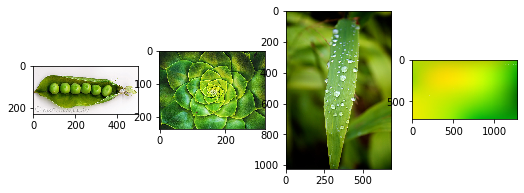

In [14]:
# Green Color
plt.figure(figsize = (20,10))
show_selected_images(images,COLORS['GREEN'],60,3)

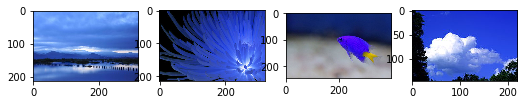

In [15]:
# Blue color
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['BLUE'],60,3)

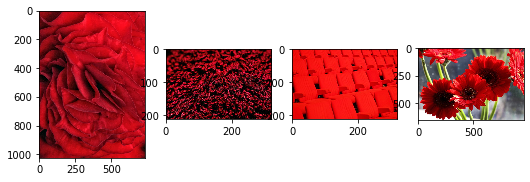

In [16]:
# Red color
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['RED'],60,3)